In [1]:
import torch


#--matplotlib
import matplotlib
from matplotlib.lines import Line2D
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
matplotlib.rc('text',usetex=True)
import pylab as py
from matplotlib import colors
import matplotlib.gridspec as gridspec


In [3]:
torch.set_default_dtype(torch.float64)

In [31]:
# Xs = 10**torch.linspace(-3,-1.001,100)
# Xs = torch.cat((Xs,torch.linspace(0.1,1,100)))
Xs = torch.linspace(0,1,100)
Vs = torch.exp(-Xs)

In [32]:
Xs,Vs

(tensor([0.0000, 0.0101, 0.0202, 0.0303, 0.0404, 0.0505, 0.0606, 0.0707, 0.0808,
         0.0909, 0.1010, 0.1111, 0.1212, 0.1313, 0.1414, 0.1515, 0.1616, 0.1717,
         0.1818, 0.1919, 0.2020, 0.2121, 0.2222, 0.2323, 0.2424, 0.2525, 0.2626,
         0.2727, 0.2828, 0.2929, 0.3030, 0.3131, 0.3232, 0.3333, 0.3434, 0.3535,
         0.3636, 0.3737, 0.3838, 0.3939, 0.4040, 0.4141, 0.4242, 0.4343, 0.4444,
         0.4545, 0.4646, 0.4747, 0.4848, 0.4949, 0.5051, 0.5152, 0.5253, 0.5354,
         0.5455, 0.5556, 0.5657, 0.5758, 0.5859, 0.5960, 0.6061, 0.6162, 0.6263,
         0.6364, 0.6465, 0.6566, 0.6667, 0.6768, 0.6869, 0.6970, 0.7071, 0.7172,
         0.7273, 0.7374, 0.7475, 0.7576, 0.7677, 0.7778, 0.7879, 0.7980, 0.8081,
         0.8182, 0.8283, 0.8384, 0.8485, 0.8586, 0.8687, 0.8788, 0.8889, 0.8990,
         0.9091, 0.9192, 0.9293, 0.9394, 0.9495, 0.9596, 0.9697, 0.9798, 0.9899,
         1.0000]),
 tensor([1.0000, 0.9899, 0.9800, 0.9702, 0.9604, 0.9507, 0.9412, 0.9317, 0.9224,
         

In [33]:
deltas = torch.empty(Xs.shape[0]+3)

In [34]:
deltas.shape

torch.Size([103])

In [35]:
deltas[2:-2] = (Vs[1:] - Vs[:-1]) / (Xs[1:] - Xs[:-1])

In [36]:
deltas

tensor([2.1220e-314,  0.0000e+00, -9.9497e-01, -9.8497e-01, -9.7507e-01,
        -9.6527e-01, -9.5557e-01, -9.4596e-01, -9.3646e-01, -9.2704e-01,
        -9.1773e-01, -9.0850e-01, -8.9937e-01, -8.9034e-01, -8.8139e-01,
        -8.7253e-01, -8.6376e-01, -8.5508e-01, -8.4649e-01, -8.3798e-01,
        -8.2956e-01, -8.2122e-01, -8.1297e-01, -8.0480e-01, -7.9671e-01,
        -7.8870e-01, -7.8077e-01, -7.7293e-01, -7.6516e-01, -7.5747e-01,
        -7.4986e-01, -7.4232e-01, -7.3486e-01, -7.2747e-01, -7.2016e-01,
        -7.1292e-01, -7.0576e-01, -6.9867e-01, -6.9164e-01, -6.8469e-01,
        -6.7781e-01, -6.7100e-01, -6.6426e-01, -6.5758e-01, -6.5097e-01,
        -6.4443e-01, -6.3795e-01, -6.3154e-01, -6.2519e-01, -6.1891e-01,
        -6.1269e-01, -6.0653e-01, -6.0044e-01, -5.9440e-01, -5.8843e-01,
        -5.8252e-01, -5.7666e-01, -5.7087e-01, -5.6513e-01, -5.5945e-01,
        -5.5383e-01, -5.4826e-01, -5.4275e-01, -5.3730e-01, -5.3190e-01,
        -5.2655e-01, -5.2126e-01, -5.1602e-01, -5.1

In [37]:
deltas[1] = 2 * deltas[2] - deltas[3]
deltas[0] = 2 * deltas[1] - deltas[2]

deltas[-2] = 2 * deltas[-3] - deltas[-4]
deltas[-1] = 2 * deltas[-2] - deltas[-3]

In [38]:
deltas

tensor([-1.0150, -1.0050, -0.9950, -0.9850, -0.9751, -0.9653, -0.9556, -0.9460,
        -0.9365, -0.9270, -0.9177, -0.9085, -0.8994, -0.8903, -0.8814, -0.8725,
        -0.8638, -0.8551, -0.8465, -0.8380, -0.8296, -0.8212, -0.8130, -0.8048,
        -0.7967, -0.7887, -0.7808, -0.7729, -0.7652, -0.7575, -0.7499, -0.7423,
        -0.7349, -0.7275, -0.7202, -0.7129, -0.7058, -0.6987, -0.6916, -0.6847,
        -0.6778, -0.6710, -0.6643, -0.6576, -0.6510, -0.6444, -0.6380, -0.6315,
        -0.6252, -0.6189, -0.6127, -0.6065, -0.6004, -0.5944, -0.5884, -0.5825,
        -0.5767, -0.5709, -0.5651, -0.5594, -0.5538, -0.5483, -0.5427, -0.5373,
        -0.5319, -0.5265, -0.5213, -0.5160, -0.5108, -0.5057, -0.5006, -0.4956,
        -0.4906, -0.4857, -0.4808, -0.4760, -0.4712, -0.4664, -0.4618, -0.4571,
        -0.4525, -0.4480, -0.4435, -0.4390, -0.4346, -0.4302, -0.4259, -0.4216,
        -0.4174, -0.4132, -0.4090, -0.4049, -0.4009, -0.3968, -0.3928, -0.3889,
        -0.3850, -0.3811, -0.3773, -0.37

In [39]:
deltas[-3] - deltas[-4]

tensor(0.0038)

In [40]:
w1s = torch.abs(deltas[3:]-deltas[2:-1])
w1s.shape

torch.Size([100])

In [41]:
w1s[-1]

tensor(0.0038)

In [42]:
w2s = torch.abs(deltas[1:-2] - deltas[:-3])

In [43]:
w2s.shape

torch.Size([100])

In [44]:
w2s[-1]

tensor(0.0038)

In [45]:
deltas[:-1]

tensor([-1.0150, -1.0050, -0.9950, -0.9850, -0.9751, -0.9653, -0.9556, -0.9460,
        -0.9365, -0.9270, -0.9177, -0.9085, -0.8994, -0.8903, -0.8814, -0.8725,
        -0.8638, -0.8551, -0.8465, -0.8380, -0.8296, -0.8212, -0.8130, -0.8048,
        -0.7967, -0.7887, -0.7808, -0.7729, -0.7652, -0.7575, -0.7499, -0.7423,
        -0.7349, -0.7275, -0.7202, -0.7129, -0.7058, -0.6987, -0.6916, -0.6847,
        -0.6778, -0.6710, -0.6643, -0.6576, -0.6510, -0.6444, -0.6380, -0.6315,
        -0.6252, -0.6189, -0.6127, -0.6065, -0.6004, -0.5944, -0.5884, -0.5825,
        -0.5767, -0.5709, -0.5651, -0.5594, -0.5538, -0.5483, -0.5427, -0.5373,
        -0.5319, -0.5265, -0.5213, -0.5160, -0.5108, -0.5057, -0.5006, -0.4956,
        -0.4906, -0.4857, -0.4808, -0.4760, -0.4712, -0.4664, -0.4618, -0.4571,
        -0.4525, -0.4480, -0.4435, -0.4390, -0.4346, -0.4302, -0.4259, -0.4216,
        -0.4174, -0.4132, -0.4090, -0.4049, -0.4009, -0.3968, -0.3928, -0.3889,
        -0.3850, -0.3811, -0.3773, -0.37

In [46]:
w1s[0]

tensor(0.0100)

In [47]:
deltas[2]-deltas[1]

tensor(0.0100)

In [48]:
ds = w1s / (w1s + w2s) * deltas[1:-2] + w2s / (w1s + w2s) * deltas[2:-1]

In [49]:
ds

tensor([-1.0000, -0.9899, -0.9800, -0.9701, -0.9604, -0.9507, -0.9412, -0.9317,
        -0.9223, -0.9131, -0.9039, -0.8948, -0.8858, -0.8769, -0.8681, -0.8594,
        -0.8507, -0.8422, -0.8337, -0.8253, -0.8171, -0.8088, -0.8007, -0.7927,
        -0.7847, -0.7768, -0.7690, -0.7613, -0.7536, -0.7460, -0.7386, -0.7311,
        -0.7238, -0.7165, -0.7093, -0.7022, -0.6951, -0.6881, -0.6812, -0.6744,
        -0.6676, -0.6609, -0.6542, -0.6477, -0.6412, -0.6347, -0.6283, -0.6220,
        -0.6158, -0.6096, -0.6035, -0.5974, -0.5914, -0.5854, -0.5796, -0.5737,
        -0.5680, -0.5623, -0.5566, -0.5510, -0.5455, -0.5400, -0.5346, -0.5292,
        -0.5239, -0.5186, -0.5134, -0.5082, -0.5031, -0.4981, -0.4931, -0.4881,
        -0.4832, -0.4784, -0.4735, -0.4688, -0.4641, -0.4594, -0.4548, -0.4502,
        -0.4457, -0.4412, -0.4368, -0.4324, -0.4280, -0.4237, -0.4195, -0.4153,
        -0.4111, -0.4070, -0.4029, -0.3988, -0.3948, -0.3909, -0.3869, -0.3830,
        -0.3792, -0.3754, -0.3716, -0.36

In [50]:
hs = Xs[1:] - Xs[:-1]

In [51]:
def locate(x,Xs):
    """
    x is a tensor of points to interpolate to
    Xs is the grid

    We should add a failsafe here for x outside the range
    """
    idx = torch.clamp(torch.searchsorted(Xs,x) - 1, 0, Xs.size(0)-2)
    return idx,idx+1

In [52]:
ks,ksp1 = locate(torch.tensor([1.1]),Xs)#.shape

In [53]:
Xs[ks],Xs[ksp1]

(tensor([0.9899]), tensor([1.]))

In [54]:
def P(x,Xs,vs,ds):
    k,kp1 = locate(x,Xs)
    
    s = x - Xs[k]
    h = Xs[kp1] - Xs[k]
    
    term1 = (3 * h * s**2 - 2 * s**3) / h**3 * vs[kp1]
    term2 = (h**3 - 3 * h * s**2 + 2 * s**3) / h**3 * vs[k]
    term3 = (s**2 * (s - h)) / h**2 * ds[kp1]
    term4 = (s * (s - h)**2) / h**2 * ds[k]
    return term1 + term2 + term3 + term4

In [55]:

xrand = 1e-3 + torch.rand(25) * (1 - 1e-3)

int_vals = P(xrand,Xs,Vs,ds)
tru_vals = torch.exp(-xrand)



Text(0, 0.5, '$\\rm rel.~diff.$')

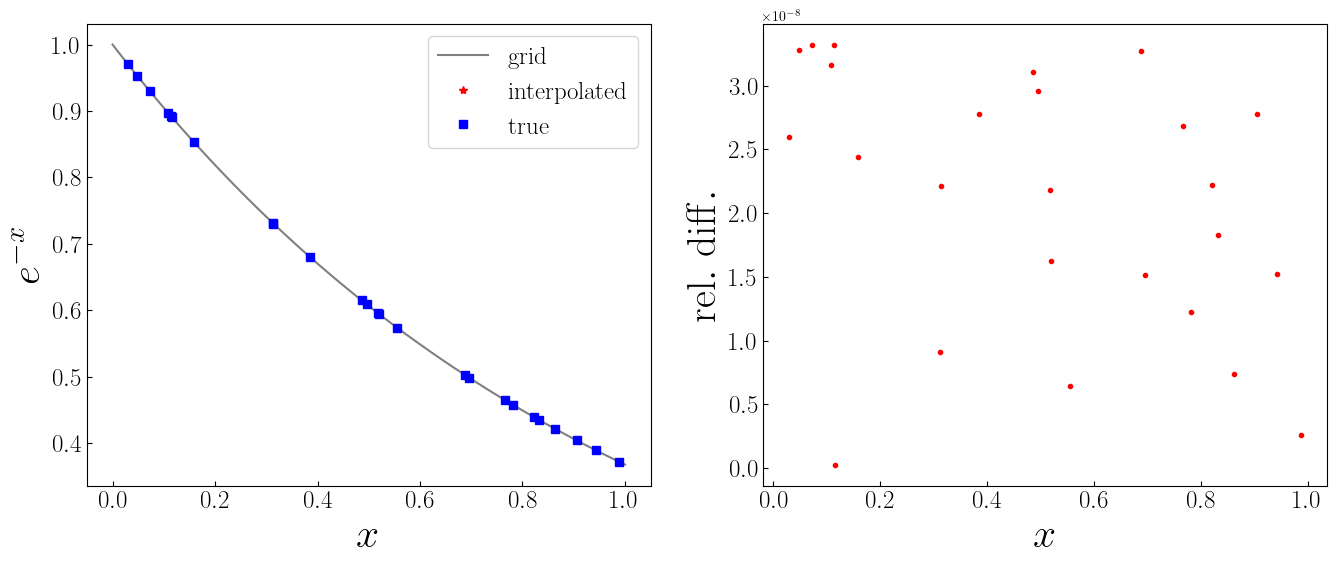

In [56]:
nrows,ncols = 1,2
py.figure(figsize=(8*ncols,6*nrows))

ax=py.subplot(nrows,ncols,1)
ax.plot(Xs,Vs,'gray',label=r'$\rm grid$')
ax.plot(xrand,int_vals,'r*',label=r'$\rm interpolated$')
ax.plot(xrand,tru_vals,'bs',label=r'$\rm true$')

ax.tick_params(direction='in',labelsize=18)
ax.legend(fontsize=18)
ax.set_xlabel(r'$x$',size=30)
ax.set_ylabel(r'$e^{-x}$',size=30)

ax=py.subplot(nrows,ncols,2)
ax.plot(xrand,torch.abs(int_vals-tru_vals)/tru_vals,'r.')
# ax.semilogx()
# ax.semilogy()

ax.tick_params(direction='in',labelsize=18)
ax.set_xlabel(r'$x$',size=30)
ax.set_ylabel(r'$\rm rel.~diff.$',size=30)

In [57]:
xrand[torch.max(torch.abs(int_vals-tru_vals)/tru_vals) == (torch.abs(int_vals-tru_vals)/tru_vals)]

tensor([0.0729])